<a href="https://colab.research.google.com/github/OugoMartin/Predicting-E-Commerce-Sales-with-Neural-Networks/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Step 1: Load Dataset
df = pd.read_csv('train.csv')

print("Initial Data Overview:")
print(df.head())
print(df.info())
print(df.describe())

Initial Data Overview:
   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688  12/06/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region      

In [5]:
# Step 2: Time-Aware Preprocessing
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
df = df.sort_values('Order Date')

In [7]:
# Fill missing sales if any
df['Sales'].fillna(method='ffill', inplace=True)

/tmp/ipython-input-791094907.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sales'].fillna(method='ffill', inplace=True)
/tmp/ipython-input-791094907.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Sales'].fillna(method='ffill', inplace=True)


In [9]:
# Step 3: Feature Engineering
# Calendar features
df['day'] = df['Order Date'].dt.day
df['month'] = df['Order Date'].dt.month
df['weekday'] = df['Order Date'].dt.weekday

# Lag features
df['lag_1'] = df['Sales'].shift(1)
df['lag_7'] = df['Sales'].shift(7)

# Rolling statistics
df['rolling_mean_7'] = df['Sales'].rolling(window=7).mean()
df['rolling_std_7'] = df['Sales'].rolling(window=7).std()

# Drop rows with NaN due to lag/rolling
df = df.dropna()

In [13]:
# Step 4: Train-Test Split (Time-Based)
train_size = int(len(df) * 0.8)
train_df = df[:train_size]
test_df = df[train_size:]

# Identify non-numerical columns to drop
non_numerical_cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name']

X_train = train_df.drop(['Sales', 'Order Date'] + non_numerical_cols, axis=1)
y_train = train_df['Sales']
X_test = test_df.drop(['Sales', 'Order Date'] + non_numerical_cols, axis=1)
y_test = test_df['Sales']

In [14]:
# Step 4: Train-Test Split (Time-Based)
train_size = int(len(df) * 0.8)
train_df = df[:train_size]
test_df = df[train_size:]

# Identify non-numerical columns to drop
non_numerical_cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name']

X_train = train_df.drop(['Sales', 'Order Date'] + non_numerical_cols, axis=1)
y_train = train_df['Sales']
X_test = test_df.drop(['Sales', 'Order Date'] + non_numerical_cols, axis=1)
y_test = test_df['Sales']

# Step 5: Scale Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
# Step 6: Define & Train MLP Regressor
mlp = MLPRegressor(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42
)

mlp.fit(X_train_scaled, y_train)

# Step 7: Predictions & Evaluation
y_pred = mlp.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Performance:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")



Model Performance:
Mean Squared Error (MSE): 290547.98
R-squared (R²): 0.17


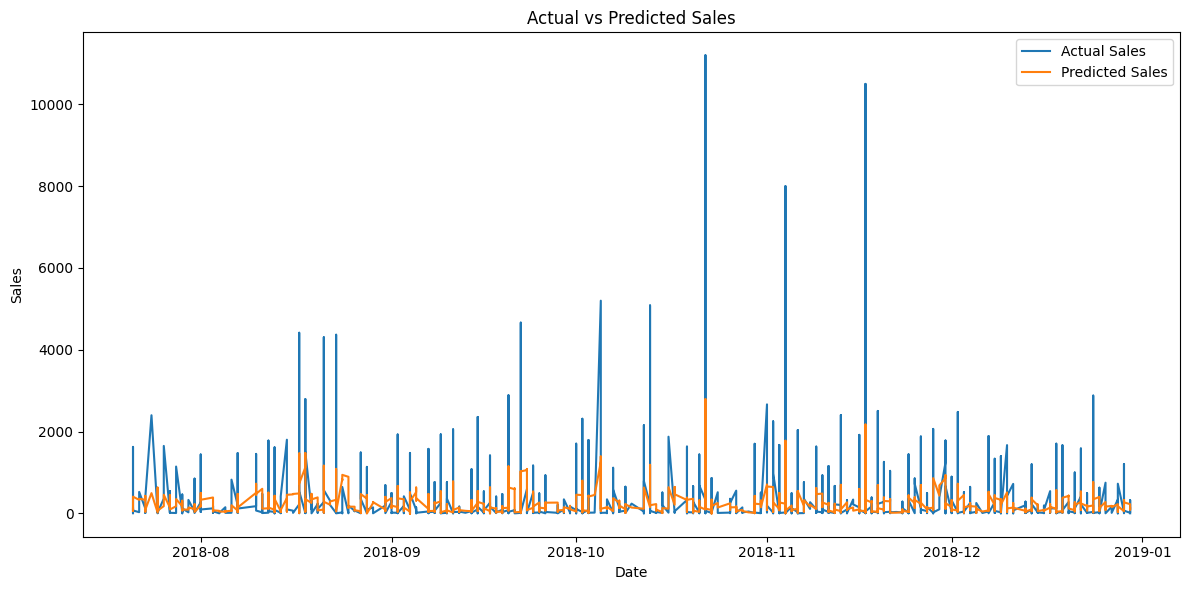

In [17]:
# Step 8: Plot Predicted vs Actual Sales
plt.figure(figsize=(12,6))
plt.plot(test_df['Order Date'], y_test, label='Actual Sales')
plt.plot(test_df['Order Date'], y_pred, label='Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.tight_layout()
plt.show()

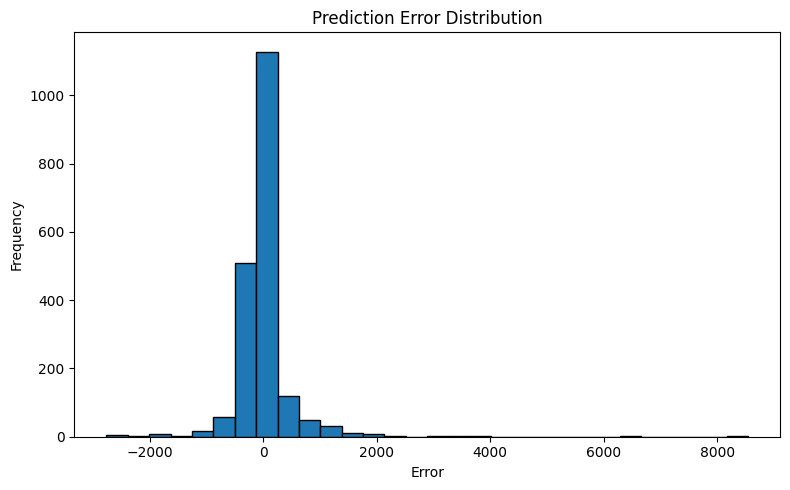

In [18]:
# Optional: Plot Error Distribution
errors = y_test - y_pred
plt.figure(figsize=(8,5))
plt.hist(errors, bins=30, edgecolor='k')
plt.title('Prediction Error Distribution')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()